# 2D

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers, regularizers
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Input, Concatenate, add
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/divinoborges/miRNAs/tcc/mirnas.csv'
df = pd.read_csv(url, sep=",")

In [6]:
df.head(5)

,FILE,MIRNA,READ,READS,classe
0,1,1,8735,76124,1
1,1,2,8442,74836,1
2,1,3,8801,76411,1
3,1,4,23959,126073,1
4,1,5,7706,71499,1


In [7]:
df.dtypes

FILE      int64
MIRNA     int64
READ      int64
READS     int64
classe    int64
dtype: object

### Armazenando as classes na variável *y*

In [8]:
y = df['classe'].values
y

array([1, 1, 1, ..., 0, 0, 0])

### Armazenando valores na variável *x*

In [9]:
x = df[['FILE', 'MIRNA', 'READ', 'READS']].values
x

array([[     1,      1,   8735,  76124],
       [     1,      2,   8442,  74836],
       [     1,      3,   8801,  76411],
       ...,
       [   552,   1879,     89,   5140],
       [   552,   1880,   2863,  29150],
       [   552,   1881,  34214, 100771]])

### Modificando as dimensões dos dados

In [10]:
x = x.reshape((552, 1881, 4))
x.shape

(552, 1881, 4)

In [11]:
y = y.reshape((552, 1881))
y.shape

(552, 1881)

In [12]:
y_new = []

for i in y:
  y_new.append(i[0])

y_new = np.array(y_new)
y = y_new
y.shape

(552,)

### Separando dados

In [13]:
x_training, x_validation, y_training, y_validation = train_test_split(x, y, test_size=0.1, random_state=5)

In [14]:
x_training.shape

(496, 1881, 4)

### Criando o modelo

In [15]:
x.shape

(552, 1881, 4)

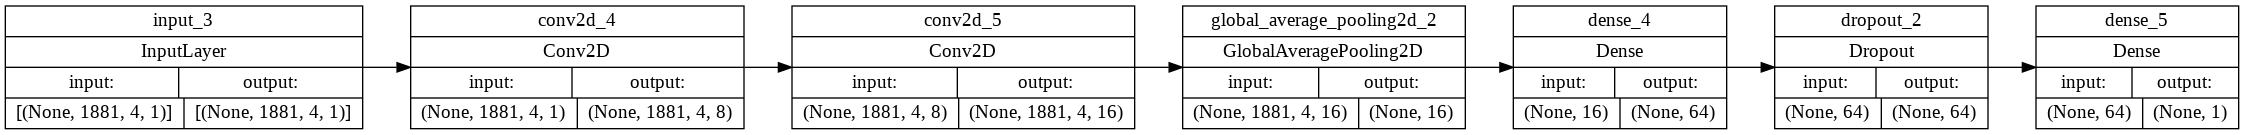

In [37]:
inputs = Input(shape=((x_training.shape[1], x_training.shape[2], 1)))

conv1 = Conv2D(8, 3, padding='same', activation='relu')(inputs)
conv2 = Conv2D(16, 3, padding='same', activation='relu')(conv1)
pool1 = GlobalAveragePooling2D()(conv2)
dense1 = Dense(64, activation='relu')(pool1)
drop1 = Dropout(0.1)(dense1)

outputs = Dense(1, activation='softmax')(drop1)

model = tf.keras.Model(inputs, outputs)

# print (model.summary())

# custom_adam = optimizers.Adam(lr=0.0001)  # , decay=0.00003, amsgrad=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['acc', 'mae'])

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


### Treinando o modelo

In [43]:
history = model.fit(x_training, y_training, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 3.4739 - acc: 0.9217 - mae: 0.0783

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 3s 200ms/step - loss: 3.4739 - acc: 0.9217 - mae: 0.0783 - val_loss: 1.4256 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 2/10
13/13 [==============================] - 2s 185ms/step - loss: 3.6020 - acc: 0.9217 - mae: 0.0783 - val_loss: 2.0198 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 3/10
13/13 [==============================] - 2s 187ms/step - loss: 2.6009 - acc: 0.9217 - mae: 0.0783 - val_loss: 0.9116 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 4/10
13/13 [==============================] - 2s 183ms/step - loss: 1.9385 - acc: 0.9217 - mae: 0.0783 - val_loss: 1.0332 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 5/10
13/13 [==============================] - 2s 185ms/step - loss: 2.0212 - acc: 0.9217 - mae: 0.0783 - val_loss: 1.1716 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 6/10
13/13 [==============================] - 2s 187ms/step - loss: 1.7361 - acc: 0.9217 - mae: 0.0783 - val_loss: 1.4549 - val_acc: 0.9400 - val_mae: 0.0600
Epoch 7/10
13/13 [=========

In [44]:
model.evaluate(x_validation, y_validation)


2/2 [==============================] - 0s 54ms/step - loss: 0.1564 - acc: 0.9464 - mae: 0.0536


[0.1563623994588852, 0.9464285969734192, 0.0535714291036129]

### Realizando predições

In [45]:
y_pred = model.predict(x_training[:10])
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

### Avaliando métricas

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1881, 4, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1881, 4, 8)        80        
                                                                 
 conv2d_5 (Conv2D)           (None, 1881, 4, 16)       1168      
                                                                 
 global_average_pooling2d_2   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                           

Matriz de confusão

In [47]:
confusion_matrix(y_training[:10], y_pred)

array([[10]])

Precisão

In [48]:
precision_score(y_training[:10], y_pred, average='macro')

1.0

Recall

In [23]:
recall_score(y_training[:10], y_pred, average='macro')

1.0

In [24]:
f1_score(y_training[:10], y_pred, average=None)

array([1.])

dict_keys(['loss', 'acc', 'mae', 'val_loss', 'val_acc', 'val_mae'])


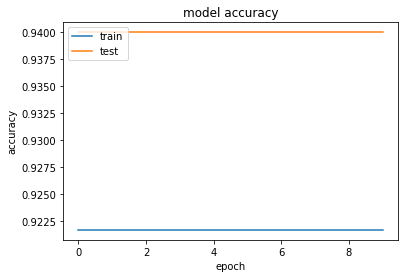

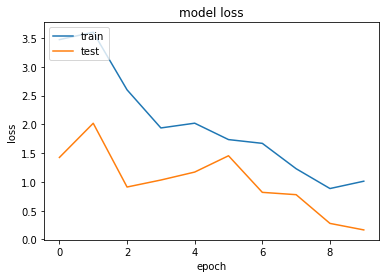

In [50]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1D

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers, regularizers
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv1D, Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Input, Concatenate, add
from keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Lendo e tratando os dados concatenados de X

In [ ]:
concatx_url = '/content/drive/My Drive/concatx.csv'
df_x = pd.read_csv(concatx_url, sep=";", header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3763) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_x = df_x.drop(3763, 1)
df_x = df_x.drop(0, 1)
df_x = df_x.drop(0, 0)

In [ ]:
df_x.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3723,3724,3725,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749,3750,3751,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761,3762
1,8735,8442,8801,23959,7706,1538,889,2534,2582,1893,1651,1,4,3483,6100,5875,9755,9944,0,0,0,1,419,5809,222,12931,30635,0,0,64,0,0,0,0,0,0,2,1,0,0,...,2821,0,0,0,0,0,0,97872,97423,98382,0,0,0,0,64920,62742,10988,128886,0,0,3550,0,0,0,1411,2937,0,0,0,0,0,3820,0,9533,4607,0,8581,8922,49026,155620
2,35173,35187,35476,47475,5295,1503,5116,15442,15725,1824,3027,12,9,8847,22184,22170,74151,74671,0,0,110,120,21,2512,640,11536,45312,0,0,79,0,0,0,0,0,0,1,0,0,3,...,5007,0,0,0,0,0,0,19401,19246,19495,0,0,0,0,68222,66193,10024,51794,0,0,3070,0,2815,0,0,1603,0,0,0,0,0,2927,0,11422,1309,0,3464,6595,14393,109649
3,32653,32514,32383,29587,9656,2539,2136,25402,25993,2778,2515,30,28,16909,16125,16055,44949,44516,0,0,188,175,11,3341,237,87284,101893,0,0,114,1,0,0,0,0,0,0,0,0,0,...,2734,0,1166,0,0,0,0,20949,20655,20365,0,0,0,0,76089,73480,7531,74578,0,1428,4283,0,1009,0,1542,3448,0,0,0,0,0,4162,0,17792,2734,0,5769,9451,26362,120333
4,63110,63501,63008,75246,6530,2727,8017,30976,31283,1839,2141,7944,8287,19535,31623,32384,40136,40177,0,0,0,1,25,3441,518,16911,110782,0,1,108,4,0,0,0,0,0,3,1,1,2,...,5001,0,2418,0,0,0,0,8046,8108,8033,0,0,0,0,58286,56364,12249,45637,0,0,1489,0,3300,0,1420,2154,0,0,0,0,0,2580,0,9505,5389,0,2732,8603,17450,118126
5,40067,39849,40175,44984,2268,2649,5055,23009,23125,2012,3020,1235,1381,7605,7964,8213,104141,103838,0,0,494,510,26,2653,290,20004,97000,0,0,128,1,0,0,0,0,0,1,0,0,0,...,3425,0,0,0,0,0,0,8439,7853,7800,0,0,0,0,99116,93012,9226,120522,0,0,1045,0,3001,0,1045,1732,0,0,0,0,0,6136,0,17332,1477,0,4844,8834,10957,154370


In [ ]:
df_x.dtypes

1       int64
2       int64
3       int64
4       int64
5       int64
        ...  
3758    int64
3759    int64
3760    int64
3761    int64
3762    int64
Length: 3762, dtype: object

In [ ]:
df_x.shape

(552, 3762)

### Lendo e tratando os dados concatenados de Y

In [ ]:
concaty_url = '/content/drive/My Drive/concaty.csv'
df_y = pd.read_csv(concaty_url, sep=";", header=None)

In [ ]:
df_y = df_y.drop(0, 1)
df_y = df_y.drop(0, 0)

In [ ]:
df_y.head(5)

,1
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [ ]:
df_y.shape

(552, 1)

### Separando dados

In [ ]:
x_training, x_validation, y_training, y_validation = train_test_split(df_x, df_y, test_size=0.1, random_state=5)

In [ ]:
x_training.shape

(496, 3762)

### Criando o modelo

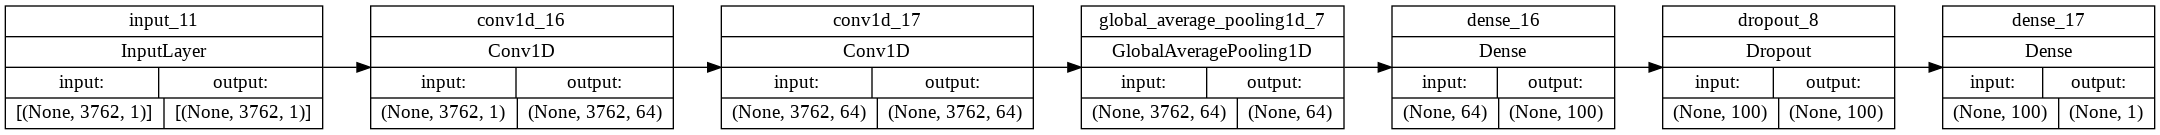

In [ ]:
inputs = Input(shape=((x_training.shape[1], 1)))

conv1 = Conv1D(64, 3, padding='same', activation='relu')(inputs)
conv2 = Conv1D(64, 3, padding='same', activation='relu')(conv1)
pool1 = GlobalAveragePooling1D()(conv2)
dense1 = Dense(100, activation='relu')(pool1)
drop1 = Dropout(0.1)(dense1)
outputs = Dense(1, activation='softmax')(drop1)

model = tf.keras.Model(inputs, outputs)

# print (model.summary())

# custom_adam = optimizers.Adam(lr=0.0001)  # , decay=0.00003, amsgrad=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['acc', 'mae'])

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")


### Treinando o modelo

In [ ]:
model.fit(x_training, y_training, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 5s 290ms/step - loss: 29.6348 - acc: 0.9254 - mae: 0.0746
Epoch 2/10
16/16 [==============================] - 5s 285ms/step - loss: 13.4992 - acc: 0.9254 - mae: 0.0746
Epoch 3/10
16/16 [==============================] - 5s 285ms/step - loss: 11.3164 - acc: 0.9254 - mae: 0.0746
Epoch 4/10
16/16 [==============================] - 5s 287ms/step - loss: 8.8759 - acc: 0.9254 - mae: 0.0746
Epoch 5/10
16/16 [==============================] - 5s 286ms/step - loss: 6.1269 - acc: 0.9254 - mae: 0.0746
Epoch 6/10
16/16 [==============================] - 5s 285ms/step - loss: 4.9778 - acc: 0.9254 - mae: 0.0746
Epoch 7/10
16/16 [==============================] - 5s 284ms/step - loss: 3.3953 - acc: 0.9254 - mae: 0.0746
Epoch 8/10
16/16 [==============================] - 5s 283ms/step - loss: 4.5190 - acc: 0.9254 - mae: 0.0746
Epoch 9/10
16/16 [==============================] - 5s 283ms/step - loss: 2.5019 - acc: 0.9254 - mae: 0.0746
Epoch 10/10
16/16 [========

In [ ]:
model.evaluate(x_validation, y_validation)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 0s 88ms/step - loss: 0.3181 - acc: 0.9464 - mae: 0.0536


[0.31811824440956116, 0.9464285969734192, 0.0535714291036129]

### Realizando predições

In [ ]:
y_pred = model.predict(x_training[:10])
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

### Avaliando métricas

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 3762, 1)]         0         
                                                                 
 conv1d_16 (Conv1D)          (None, 3762, 64)          256       
                                                                 
 conv1d_17 (Conv1D)          (None, 3762, 64)          12352     
                                                                 
 global_average_pooling1d_7   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 100)               6500      
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                           

Matriz de confusão

In [ ]:
confusion_matrix(y_training[:10], y_pred)

array([[10]])

Precisão

In [ ]:
precision_score(y_training[:10], y_pred, average='macro')

1.0

Recall

In [ ]:
recall_score(y_training[:10], y_pred, average='macro')

1.0

In [ ]:
f1_score(y_training[:10], y_pred, average=None)

array([1.])